/Users/hidehisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  
  0%|          | 0/7848 [00:00<?, ?it/s]


AttributeError: 'FigureCanvasAgg' object has no attribute 'renderer'

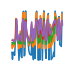

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
from tqdm import tqdm
from pathlib import Path
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

train = pd.read_csv("/Users/hidehisa/.kaggle/competitions/plasticc/training_set.csv")
if os.path.exists("./datafig"):
    shutil.rmtree("./datafig")
    os.mkdir("./datafig")
else:
    os.mkdir("./datafig")

sum = 0
for ob in tqdm(train.object_id.unique()):
    sum += 1
    tmp_obj = ob
    
    plt.figure(figsize=(1, 1))
    for i in range (len(train.query("object_id=="+str(tmp_obj)).passband.value_counts())):
        plt.plot(train.query("object_id=="+str(tmp_obj)+"and passband=="+str(i+1)).sort_values("mjd").flux)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.tick_params(length=0)
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.yticks([])
    plt.xticks([])

    plt.figure().canvas.draw()
    plt.figure().canvas.tostring_rgb()
    data = np.fromstring(plt.figure().canvas.tostring_rgb(), dtype=np.uint8, sep="")
    data = data.reshape(plt.canvas.get_width_height()[::-1] + (3,))
    plt.close()
    print(data)